In [1]:
#Imports and working directory
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

import os 
os.chdir(r'C:\Users\david\Desktop\TFG\Implementación\Model\Data')

#Open a console
%qtconsole

Load the data.

adults_first_admission_v2.csv -Contains patient information and class

SeverityScore_20200611.csv -Contains the features for the calculation of the Severity Score.

The link between both dataframes is 'icustay_id'

In [2]:
#Load the data

#patient info
adults = pd.read_csv('adults_first_admission_v2_20200611.csv')

#severity scores
sofa = pd.read_csv('sofa_20200611.csv')
oasis = pd.read_csv('oasis_20200611.csv')
saps = pd.read_csv('saps_20200611.csv')
sapsii = pd.read_csv('sapsii_20200611.csv')

#dictionary with the severity scores dataframes
severity = {'sofa':sofa, 'oasis':oasis, 'saps':saps, 'sapsii':sapsii}

Drop the columns that contain the feature scores (ie. heart rate score), the severity score (ie. sofa) and patient information except from 'icustay_id' in order to leave each dataframe with just the features used to calculate the severity score plus the id 'icustay_id'.

In [3]:
patient_info_cols = ['subject_id', 'hadm_id'] 
oasis_info_cols = ['icustay_age_group', 'hospital_expire_flag', 'icustay_expire_flag']
sofa_scores = ['coagulation', 'respiration', 'liver', 'renal', 'cardiovascular', 'cns']

for key in severity:
    severity[key].drop(severity[key].filter(regex = '_score').columns, axis = 1, inplace = True)
    severity[key].drop(severity[key].filter(regex = key).columns, axis = 1, inplace = True)
    if key == 'sofa':
        severity[key].drop(sofa_scores, axis = 1, inplace = True)
    severity[key].drop(patient_info_cols, axis = 1, inplace = True)
    if key == 'oasis':
        severity[key].drop(oasis_info_cols, axis = 1, inplace = True)

Now we want to get which columns have na values for each dataframe to decide how we will solve this missing values problems depending on the feature nature.

In [4]:
for key in severity:
    print('---')
    print(key)
    print('---')
    print(severity[key].isnull().sum())  


---
sofa
---
icustay_id            0
pao2fio2          20341
platelet            736
bilirubin         22271
dopamine          36872
epinephrine       37362
norepinephrine    34870
dobutamine        38232
map                 737
gcs                 843
creatinine          623
uo                 1799
dtype: int64
---
oasis
---
icustay_id            0
age                   0
preiculos             0
gcs                 843
heartrate_min       733
heartrate_max       733
meanbp_min          737
meanbp_max          737
resprate_min        787
resprate_max        787
tempc_min          1483
tempc_max          1483
uo                 1799
mechvent              0
electivesurgery       0
dtype: int64
---
saps
---
icustay_id             0
age                    0
heartrate_min        733
heartrate_max        733
sysbp_min            763
sysbp_max            763
resprate_min         787
resprate_max         787
tempc_min           1483
tempc_max           1483
uo                  1799
mechvent   

In [5]:
severity['oasis']['preiculos'].loc[~severity['oasis']['preiculos'].str.contains('days')] = '0'
splitted = severity['oasis']['preiculos'].str.split('days', expand = True) 
severity['oasis']['preiculos'] = splitted[0].astype(int)

C:\Users\david\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Now we will look at the distribution of all the features (excluding the missing values).

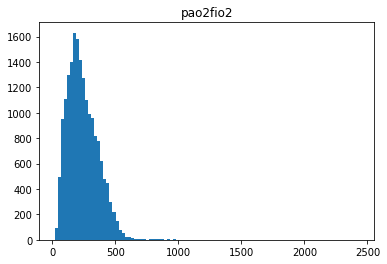

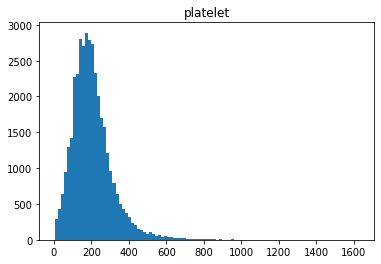

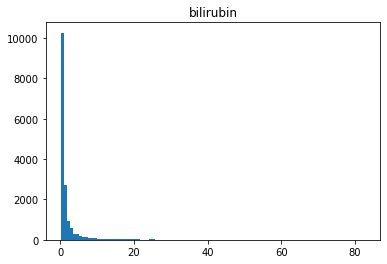

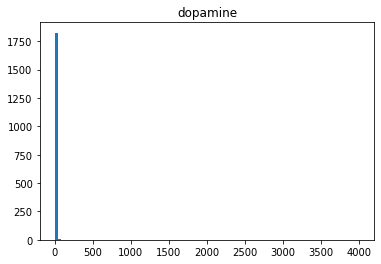

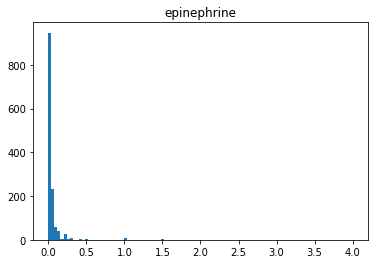

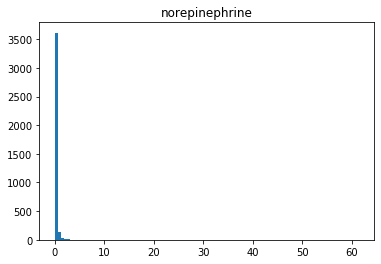

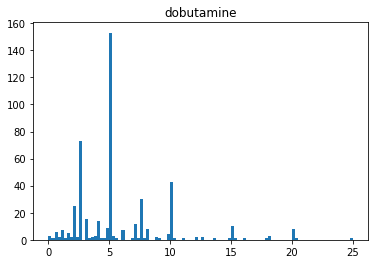

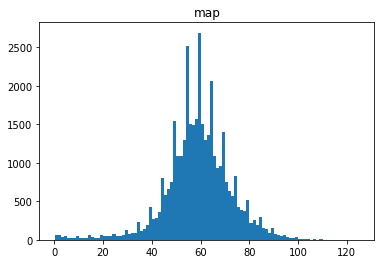

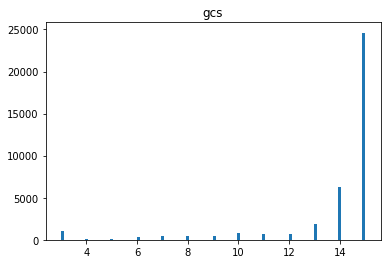

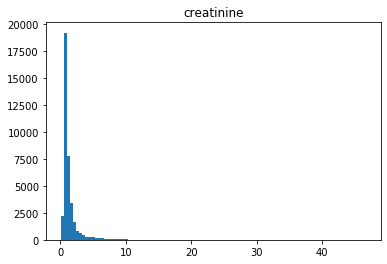

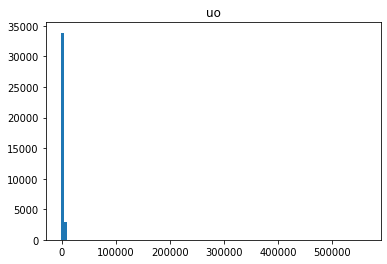

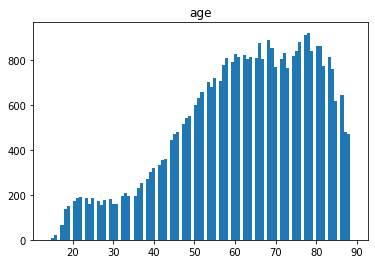

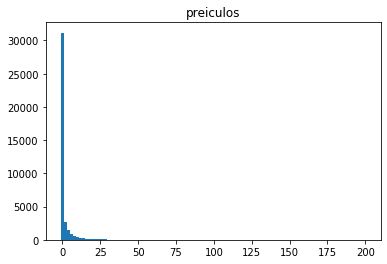

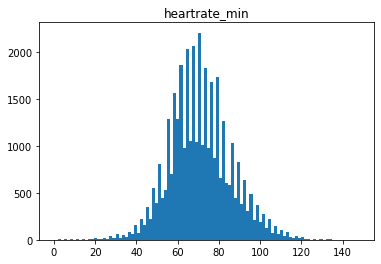

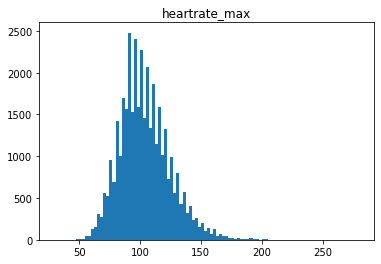

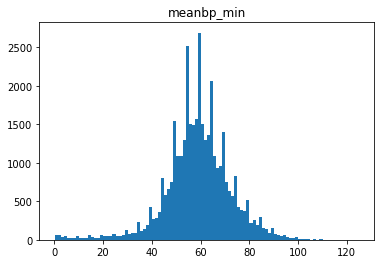

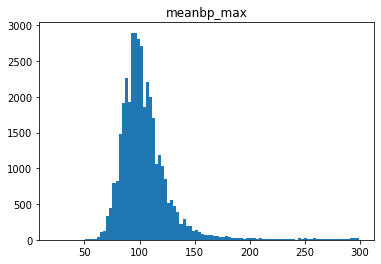

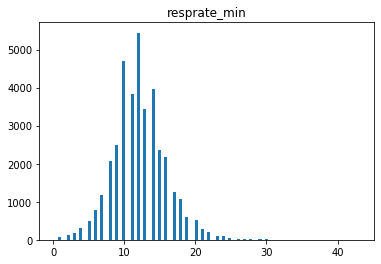

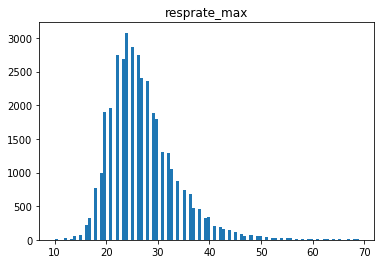

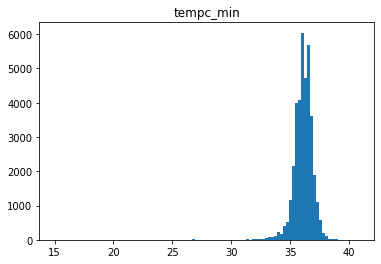

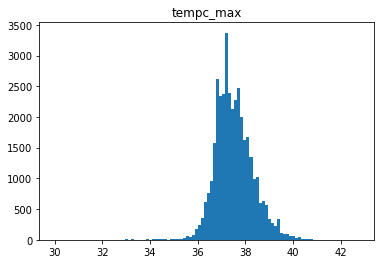

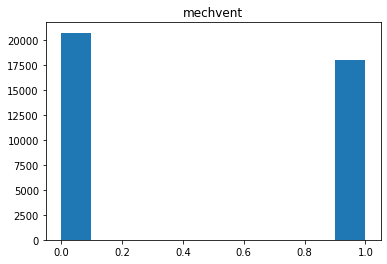

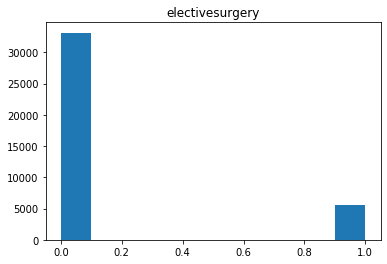

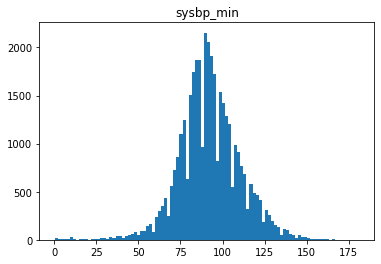

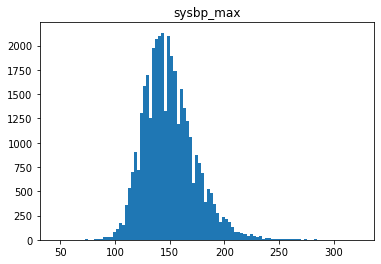

C:\Users\david\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


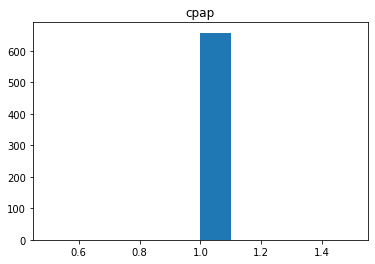

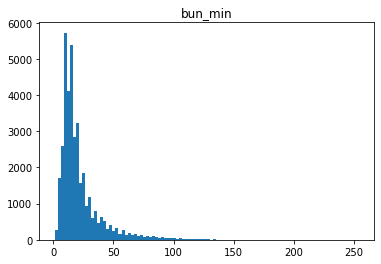

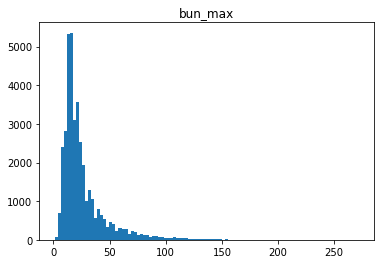

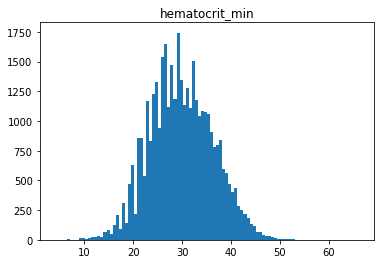

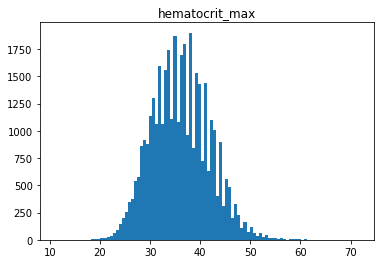

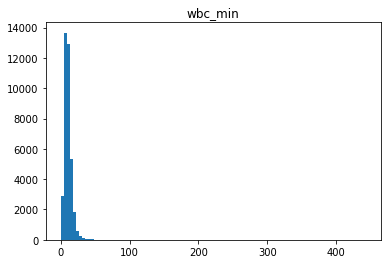

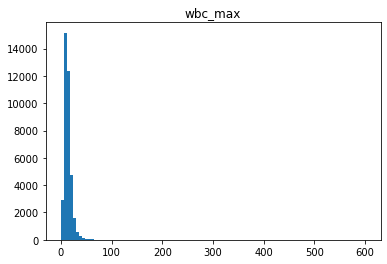

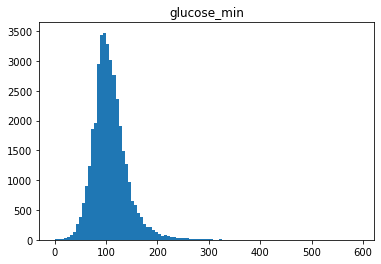

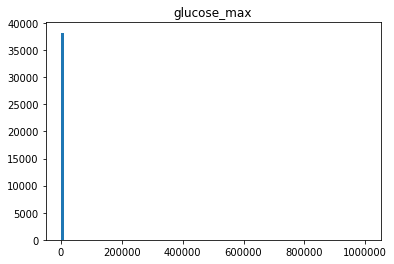

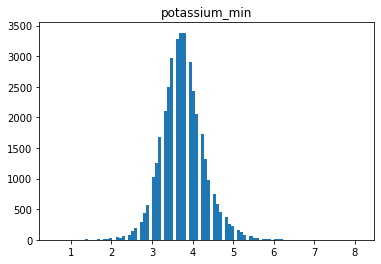

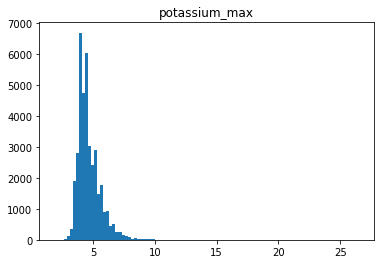

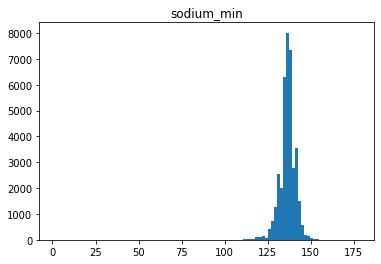

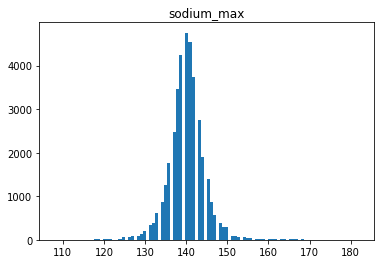

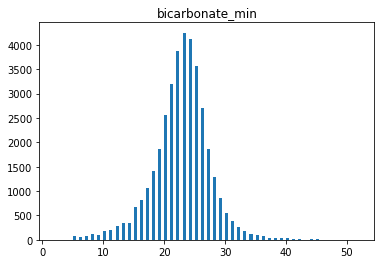

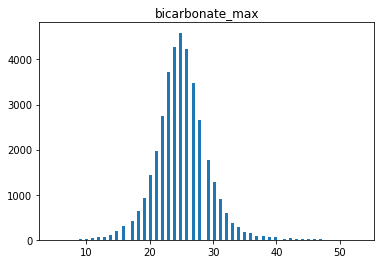

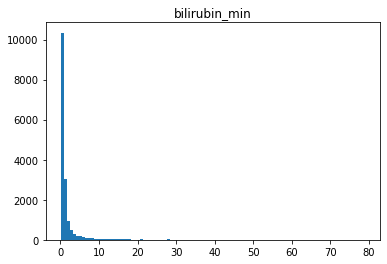

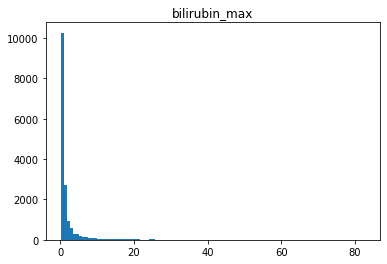

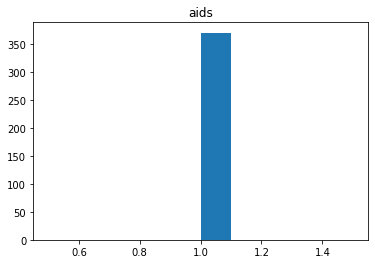

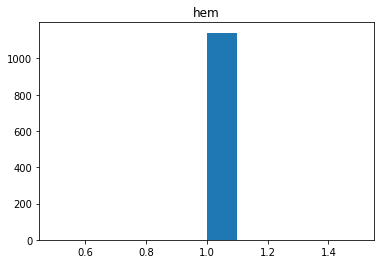

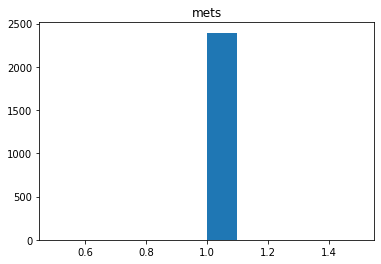

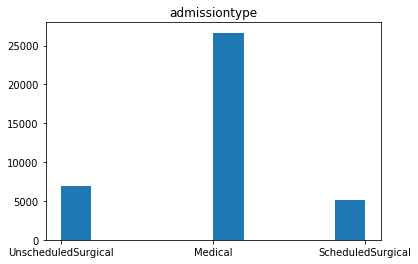

In [6]:
cols = ['icustay_id']
bins = 100

for key in severity:
    for c in severity[key].columns:
        if c not in cols:
            if len(severity[key][c].unique()) <= 2:
                plt.hist(severity[key][c])
            elif c == 'admissiontype':
                plt.hist(severity[key][c])
            else: 
                plt.hist(severity[key][c][~np.isnan(severity[key][c])], bins = bins)
            plt.title(c)
            plt.savefig('EDA/' + c + '.png')
            plt.show()
            cols.append(c)

In [7]:
print(c)
print('---')
print(cols)

admissiontype
---
['icustay_id', 'pao2fio2', 'platelet', 'bilirubin', 'dopamine', 'epinephrine', 'norepinephrine', 'dobutamine', 'map', 'gcs', 'creatinine', 'uo', 'age', 'preiculos', 'heartrate_min', 'heartrate_max', 'meanbp_min', 'meanbp_max', 'resprate_min', 'resprate_max', 'tempc_min', 'tempc_max', 'mechvent', 'electivesurgery', 'sysbp_min', 'sysbp_max', 'cpap', 'bun_min', 'bun_max', 'hematocrit_min', 'hematocrit_max', 'wbc_min', 'wbc_max', 'glucose_min', 'glucose_max', 'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min', 'bilirubin_max', 'aids', 'hem', 'mets', 'admissiontype']
